In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from utils import draw_decision_boundary
plt.style.use('ggplot')
%matplotlib inline

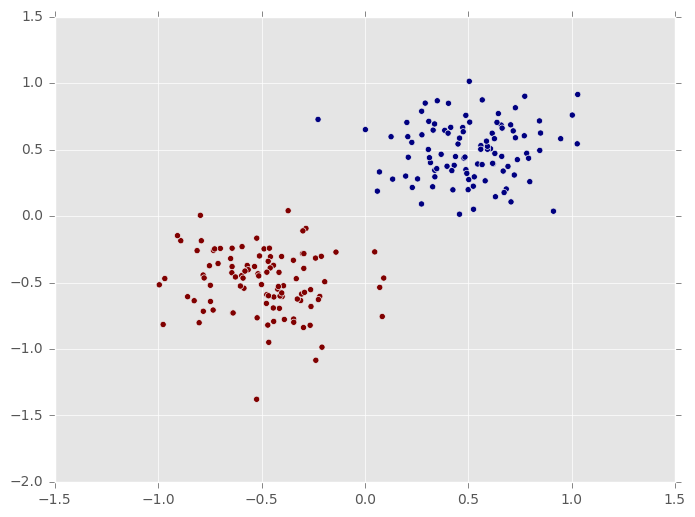

In [2]:
rng = np.random.RandomState(12345)
xx = rng.multivariate_normal([0.5, 0.5], [[0, 0.05], [0.05, 0]], size=(100,))
yy = rng.multivariate_normal([-0.5, -0.5], [[0, 0.05], [0.05, 0]], size=(100,))
X = np.r_[xx, yy]
y = np.ones((200,))
y[:100] = 0
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y)

In [3]:
class Perceptron2D(object):
    
    def __init__(self, weights=None, rng=None):
        if rng is None:
            rng = np.random.RandomState(123)
        if weights is None:
            weights = rng.rand(3,)
        self.weights = weights.reshape(-1, 1)
        
    def predict(self, x):
        if x.shape[1] == 2:
            x = np.c_[x, np.ones((x.shape[0],))]
        activation = np.dot(x, self.weights).ravel()
        return (activation >= 0).astype(int)
    
    def train(self, x, y, n_iter=50):
        x = np.c_[x, np.ones((x.shape[0],))]
        prediction = self.predict(x)
        _iter = 0
        while not np.all(prediction == y):
            false_negatives = np.logical_and(prediction == 0, y == 1)
            false_positives = np.logical_and(prediction == 1, y == 0)
            self.weights += np.sum(x[false_negatives, :], axis=0).reshape(-1, 1)
            self.weights -= np.sum(x[false_positives, :], axis=0).reshape(-1, 1)
            _iter += 1
            prediction = self.predict(x)
            if _iter > n_iter:
                break

Accuracy: 0.475


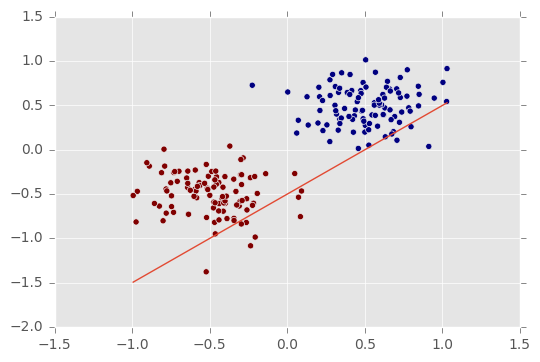

In [4]:
perc = Perceptron2D(weights=np.array([[-1], [1], [0.5]]))
prediction = perc.predict(X)
print("Accuracy: {}".format(accuracy_score(y, prediction)))
draw_decision_boundary(perc.weights.ravel(), X, y)

Accuracy: 1.0


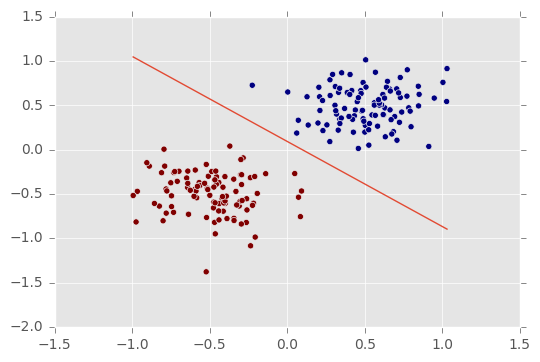

In [5]:
perc.train(X, y)
prediction = perc.predict(X)
print("Accuracy: {}".format(accuracy_score(y, prediction)))
draw_decision_boundary(perc.weights.ravel(), X, y)